# Prophet

Facebook에서 연구
후속 연구로 AR-NET, Neural Prophet을 제시함

* "Forecasting at Scale"(2018) - Prophet 모형

* "AR-NET : A SIMPLE AUTO-REGRESSION NEURAL NETWORK FOR TIME SERIES"(2019)" - AR-Net 모형

* "NeuralProphet : Explainable Forecasting at Scale"(2021) - Neural Prophet 모형

</br>

Prophet은 비선형 추세가 연도, 별, 주 별, 일 별 등 계절성 효과가 강하고, 여러 시즌의 과거 데이터가 있는 시계열에서 가장 잘 작동한다.

Prophet은 누락된 데이터와 추세 변화에 강하며 일반적으로 이상 값을 잘 처리한다.

In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('COVID19.csv',header=0, index_col=0) # 307 data
df['ds'] = pd.to_datetime(df.index, format='%Y-%m-%d')
df['y'] = df['NewCovid']
df = df[['ds','y']]
df


Importing plotly failed. Interactive plots will not work.


,ds,y
Date,,
2020-04-09,2020-04-09,39
2020-04-10,2020-04-10,27
2020-04-11,2020-04-11,30
2020-04-12,2020-04-12,32
2020-04-13,2020-04-13,25
...,...,...
2021-02-05,2021-02-05,370
2021-02-06,2021-02-06,393
2021-02-07,2021-02-07,371


예측을 위해서 예측하고자 하는 날짜가 'ds' column에 있어야 한다. 그리고 예측하기위한 data는 y에 위치해야한다.

In [2]:
df_prophet = Prophet()
df_prophet.fit(df)

df_forecast = df_prophet.make_future_dataframe(periods = 50, freq = 'D')
df_forecast.tail(10) # 50개 예측한 것 중 뒤에 10개 출력


14:49:44 - cmdstanpy - INFO - Chain [1] start processing
14:49:44 - cmdstanpy - INFO - Chain [1] done processing


,ds
347,2021-03-22
348,2021-03-23
349,2021-03-24
350,2021-03-25
351,2021-03-26
352,2021-03-27
353,2021-03-28
354,2021-03-29
355,2021-03-30
356,2021-03-31


* ### 예측 결과 확인

In [3]:
df_forecast = df_prophet.predict(df_forecast)

df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
352,2021-03-27,885.100300,654.463080,1099.491972
353,2021-03-28,878.159181,626.914342,1120.241098
354,2021-03-29,851.079749,606.858850,1073.295842
355,2021-03-30,855.458726,616.285486,1091.684640
356,2021-03-31,907.584241,674.803398,1150.532716


* ### 예측 값 시각화

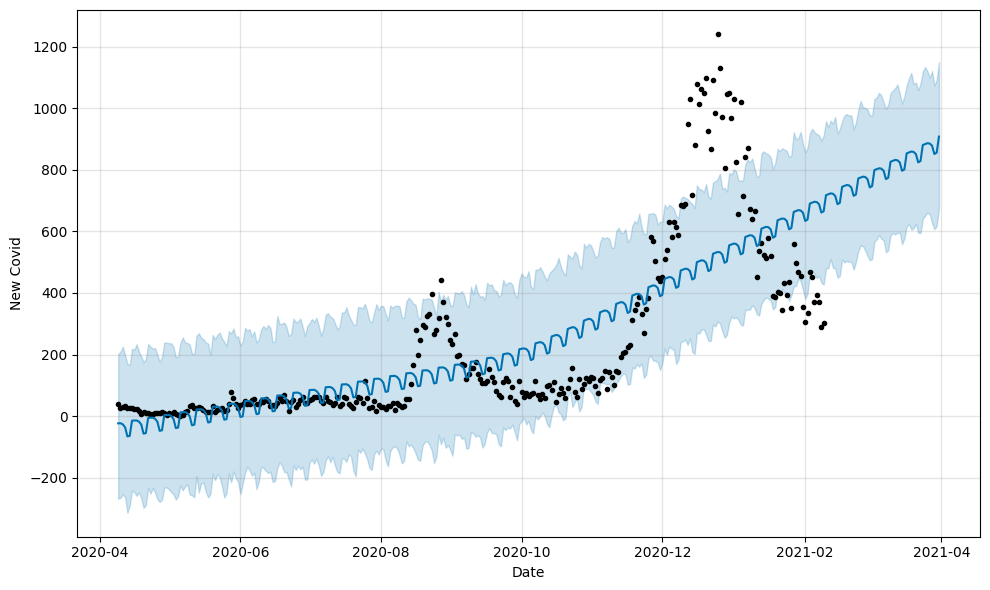

In [6]:
df_prophet.plot(df_forecast, xlabel='Date', ylabel='New Covid')
plt.show()


파란 음영은 트렌드를 의미하고, 검은 점들은 실제 데이터들이다., 예측 값은 파란선으로 표시되고 있다.

* ### 예측 구성요소 확인

예측에 사용된 구성 요소는 Prophet.plot_components 메서드를 사용해서 확인할 수 있다. 기본적으로 시계열의 추세, 연간 계절성, 주간 계절성이 표시됨

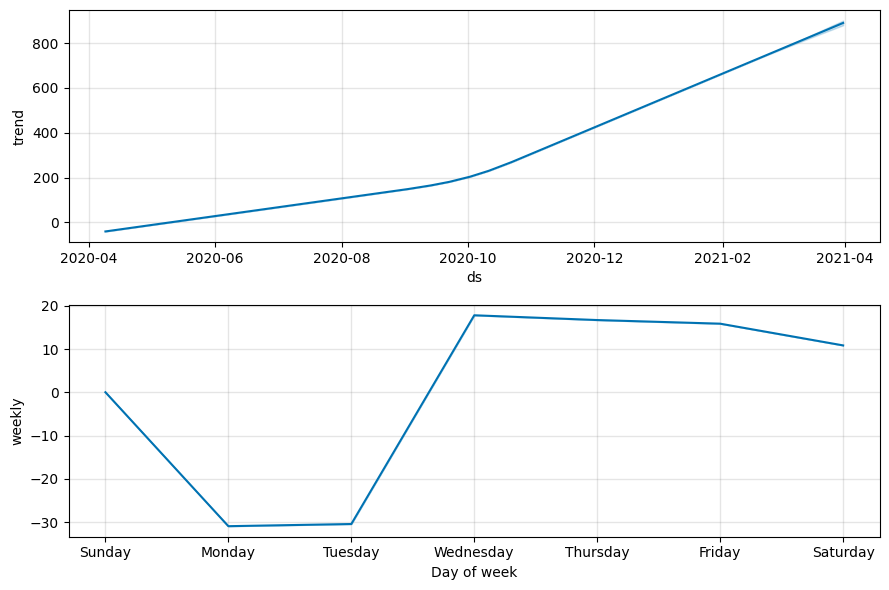

In [5]:
fig = df_prophet.plot_components(df_forecast)
plt.show()
